# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_excel("Raisin_Dataset.xlsx")
df

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524          442.246          253.291         0.820       90546   
1    75166          406.691          243.032         0.802       78789   
2    90856          442.267          266.328         0.798       93717   
3    45928          286.541          208.760         0.685       47336   
4    79408          352.191          290.828         0.564       81463   
..     ...              ...              ...           ...         ...   
895  83248          430.077          247.839         0.817       85839   
896  87350          440.736          259.293         0.809       90899   
897  99657          431.707          298.837         0.722      106264   
898  93523          476.344          254.176         0.846       97653   
899  85609          512.082          215.272         0.907       89197   

     Extent  Perimeter    Class  
0     0.759   1184.040  Kecimen  
1     0.684   1121.786  Kecimen  
2     0.638   1208.575  Kecimen  
3     0.700    844.162  Kecimen  
4     0.793   1073.251  Kecimen  
..      ...        ...      ...  
895   0.669   1129.072    Besni  
896   0.636   1214.252    Besni  
897   0.741   1292.828    Besni  
898   0.659   1258.548    Besni  
899   0.632   1272.862    Besni  

[900 rows x 8 columns]

In [3]:
df.shape

(900, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df.describe().T.style.background_gradient(cmap='PiYG', axis=1)

In [6]:
df.describe(include='O').T

count unique      top freq
Class   900      2  Kecimen  450

## Exploratory Data Analysis and Visualization

In [7]:
df["Class"].value_counts(normalize=True).to_frame(name='percentage').reset_index()

index  percentage
0  Kecimen       0.500
1    Besni       0.500

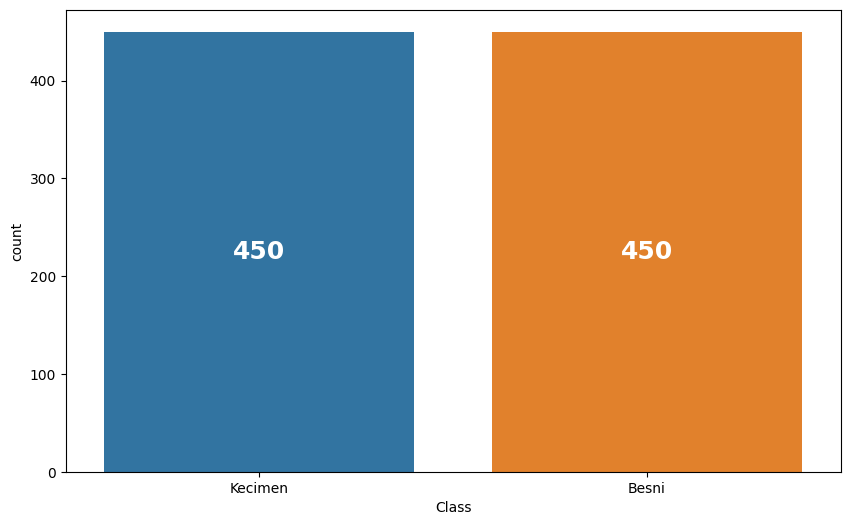

In [10]:
g = sns.countplot(data = df, x = "Class")
g.bar_label(g.containers[0], label_type='center', fontsize=18, color='w', weight='bold');

- Veri setinde hemen hemen aynı sayıda sınıfımız var. Bu yüzden sınıflandırıcının performansını değerlendirmek için doğruluğu bir metrik olarak kullanabilirim.

<AxesSubplot:title={'center':'Percentage of Class'}>

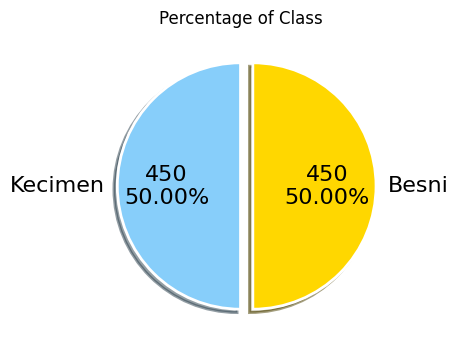

In [9]:
df["Class"].value_counts(normalize=True).plot.pie(
#     subplots=True, layout=(1,2),
#     legend=False,
    explode=[0, 0.1],
    shadow=True,
    colors=["LightSkyBlue",  "gold"],
    textprops={'fontsize':16, 'color':'k'},
    wedgeprops = {'linewidth':2, 'edgecolor':'white'},
    autopct=lambda x: '{:.0f}\n{:.2f}%'.format(len(df['Class'])*x/100, x), # "%.1f%%"
#     lambda x: '{:.0f}\n{:.2f}%'.format(len(df['species'])*x/100, x) 
#     lambda x: f'{(x/100*len(df['species'])):.0f}\n{x:.2f}%'
    startangle=90,
    title="Percentage of Class",
    ylabel= "",
#     labels=['Kecimen', 'Besni'],
    figsize=(4, 4),
)

In [11]:
df['Class'].astype('category').cat.codes.value_counts()

1    450
0    450
dtype: int64

In [12]:
df[['Class']].apply(lambda x: pd.factorize(x, sort=True)[0]).value_counts()

Class
0        450
1        450
dtype: int64

In [13]:
df["Class"] = df["Class"].map({"Kecimen":0,"Besni":1})

### Corr var mı? True | False

In [14]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

True

In [15]:
def check_multicolinarity(data):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= 0.9 and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

check_multicolinarity(df)

Multicolinarity Data (5, 5)


In [16]:
df.corr()['Class'].sort_values(key=abs, ascending=False)

Class              1.000
MajorAxisLength    0.673
Perimeter          0.666
Area               0.626
ConvexArea         0.626
MinorAxisLength    0.503
Eccentricity       0.438
Extent            -0.155
Name: Class, dtype: float64

<AxesSubplot:>

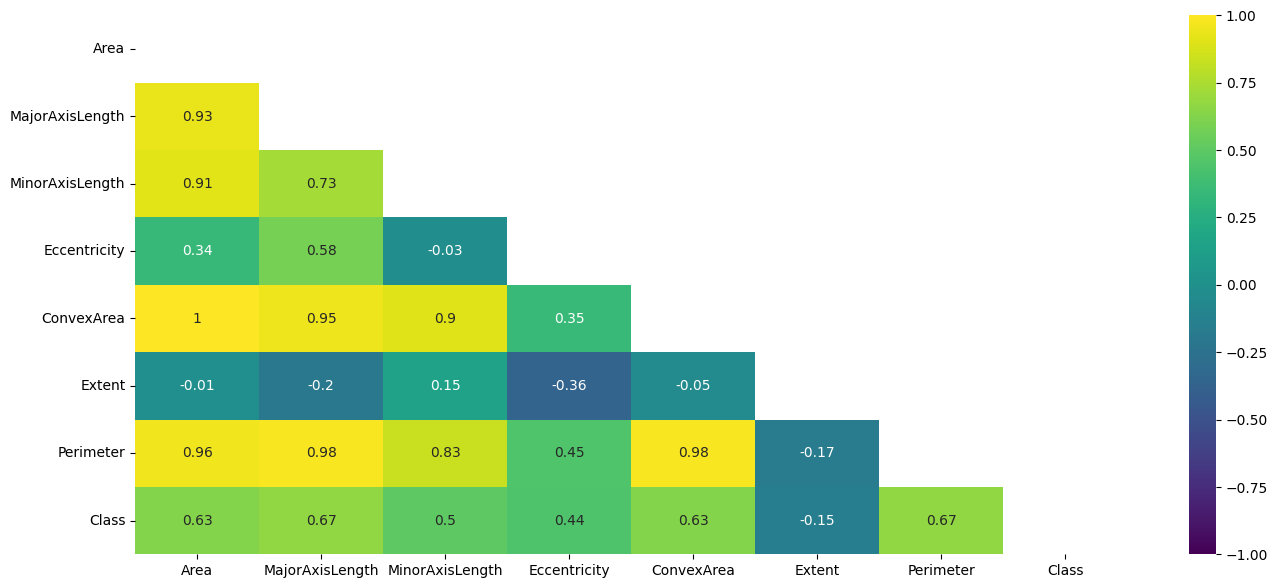

In [17]:
plt.figure(figsize=(16,7))
sns.heatmap(
    df.corr().round(2), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1, 
    cmap='viridis'
)

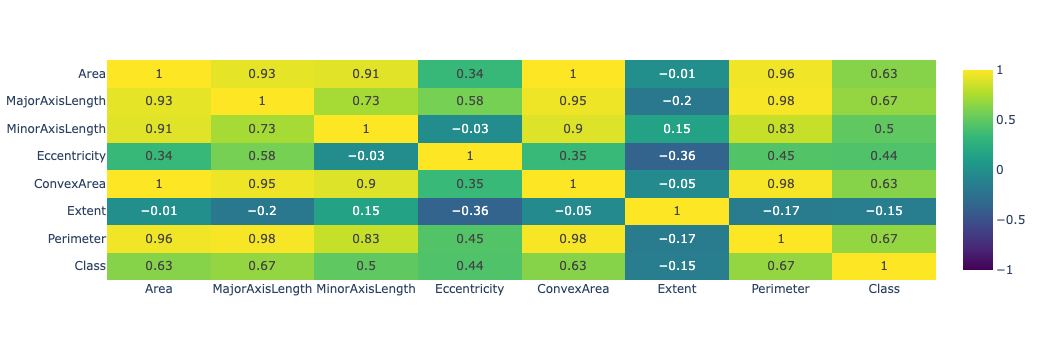

In [18]:
fig = px.imshow(
    df.corr().round(2), 
    text_auto=True, zmin=-1, zmax=1,
    color_continuous_scale='viridis',
    aspect="auto",
)
fig.show()

In [19]:
# !pip install plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

#Enabling the offline mode for interactive plotting locally
# !pip install cufflinks 
import cufflinks as cf; cf.go_offline()
import plotly.offline as py
from plotly.offline import plot, iplot
from plotly.offline import init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)

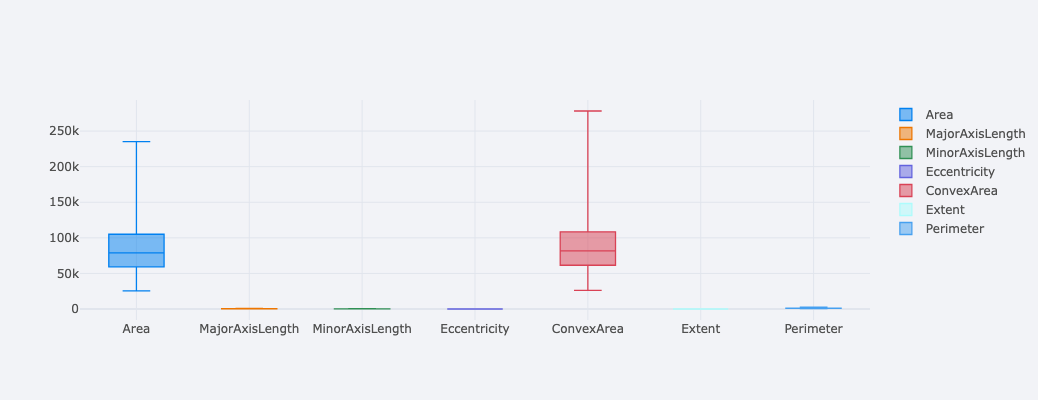

In [20]:
df.iloc[:,:-1].iplot(
    kind="box",
    theme = 'polar',
    dimensions =(800,400),
    title= '', 
    xTitle = '', 
    yTitle= '',  
)

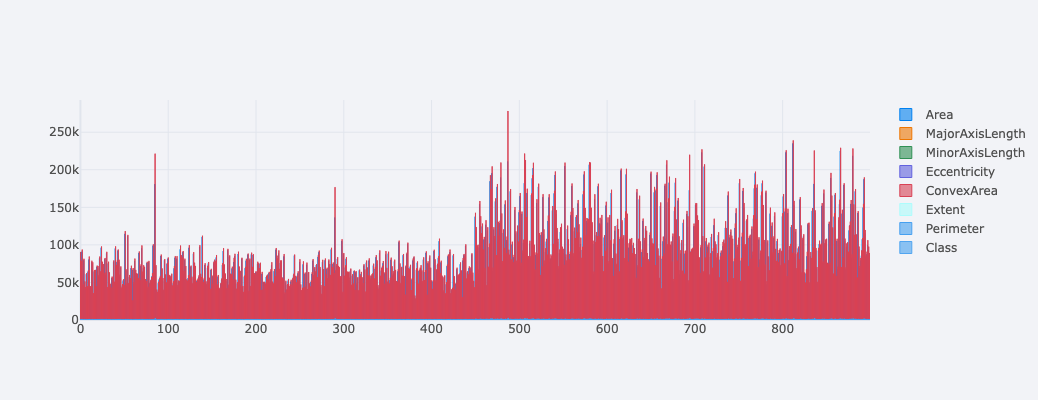

In [21]:
df.iplot(
    kind="bar",
    theme = 'polar',
    dimensions =(800,400),
    title= '', 
    xTitle = '', 
    yTitle= '',  
)

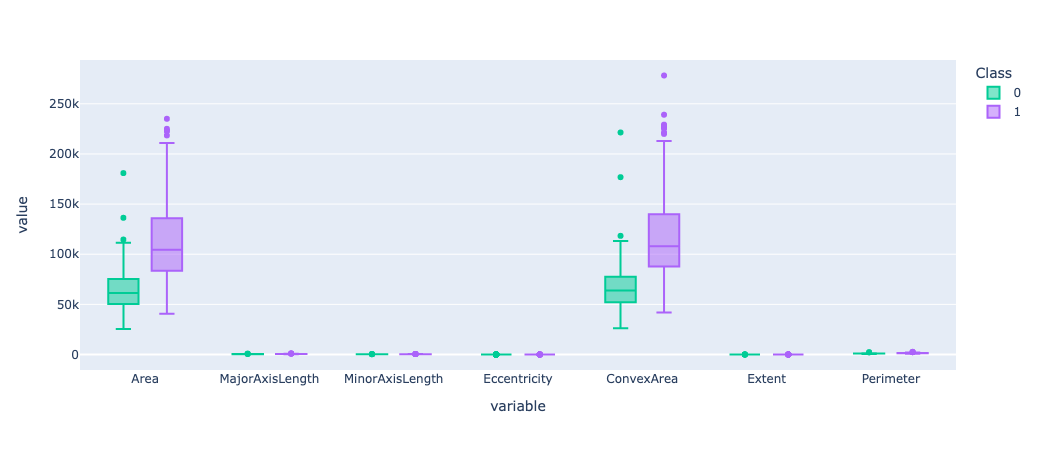

In [22]:
fig = px.box(
    df, 
    color="Class", color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'},
    height=450, width=900,
)
fig.show()

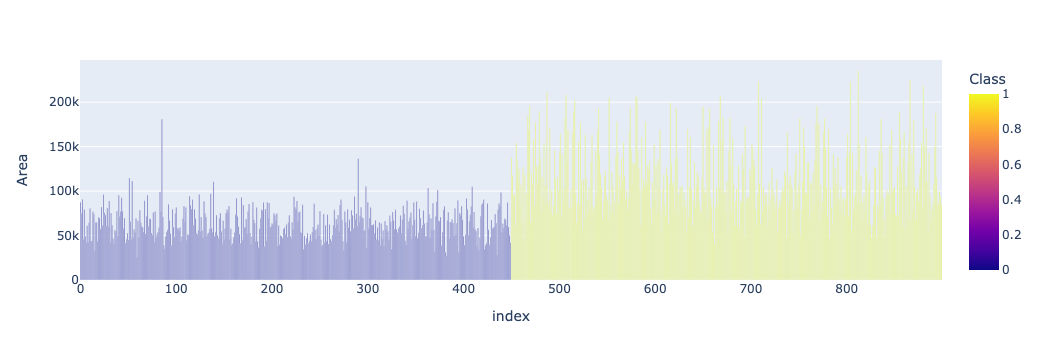

In [23]:
fig = px.bar(df, x = df.index, y = "Area", color = "Class", color_discrete_map = {1:'#FF0000', 0:'#00FF00'})
fig.show()

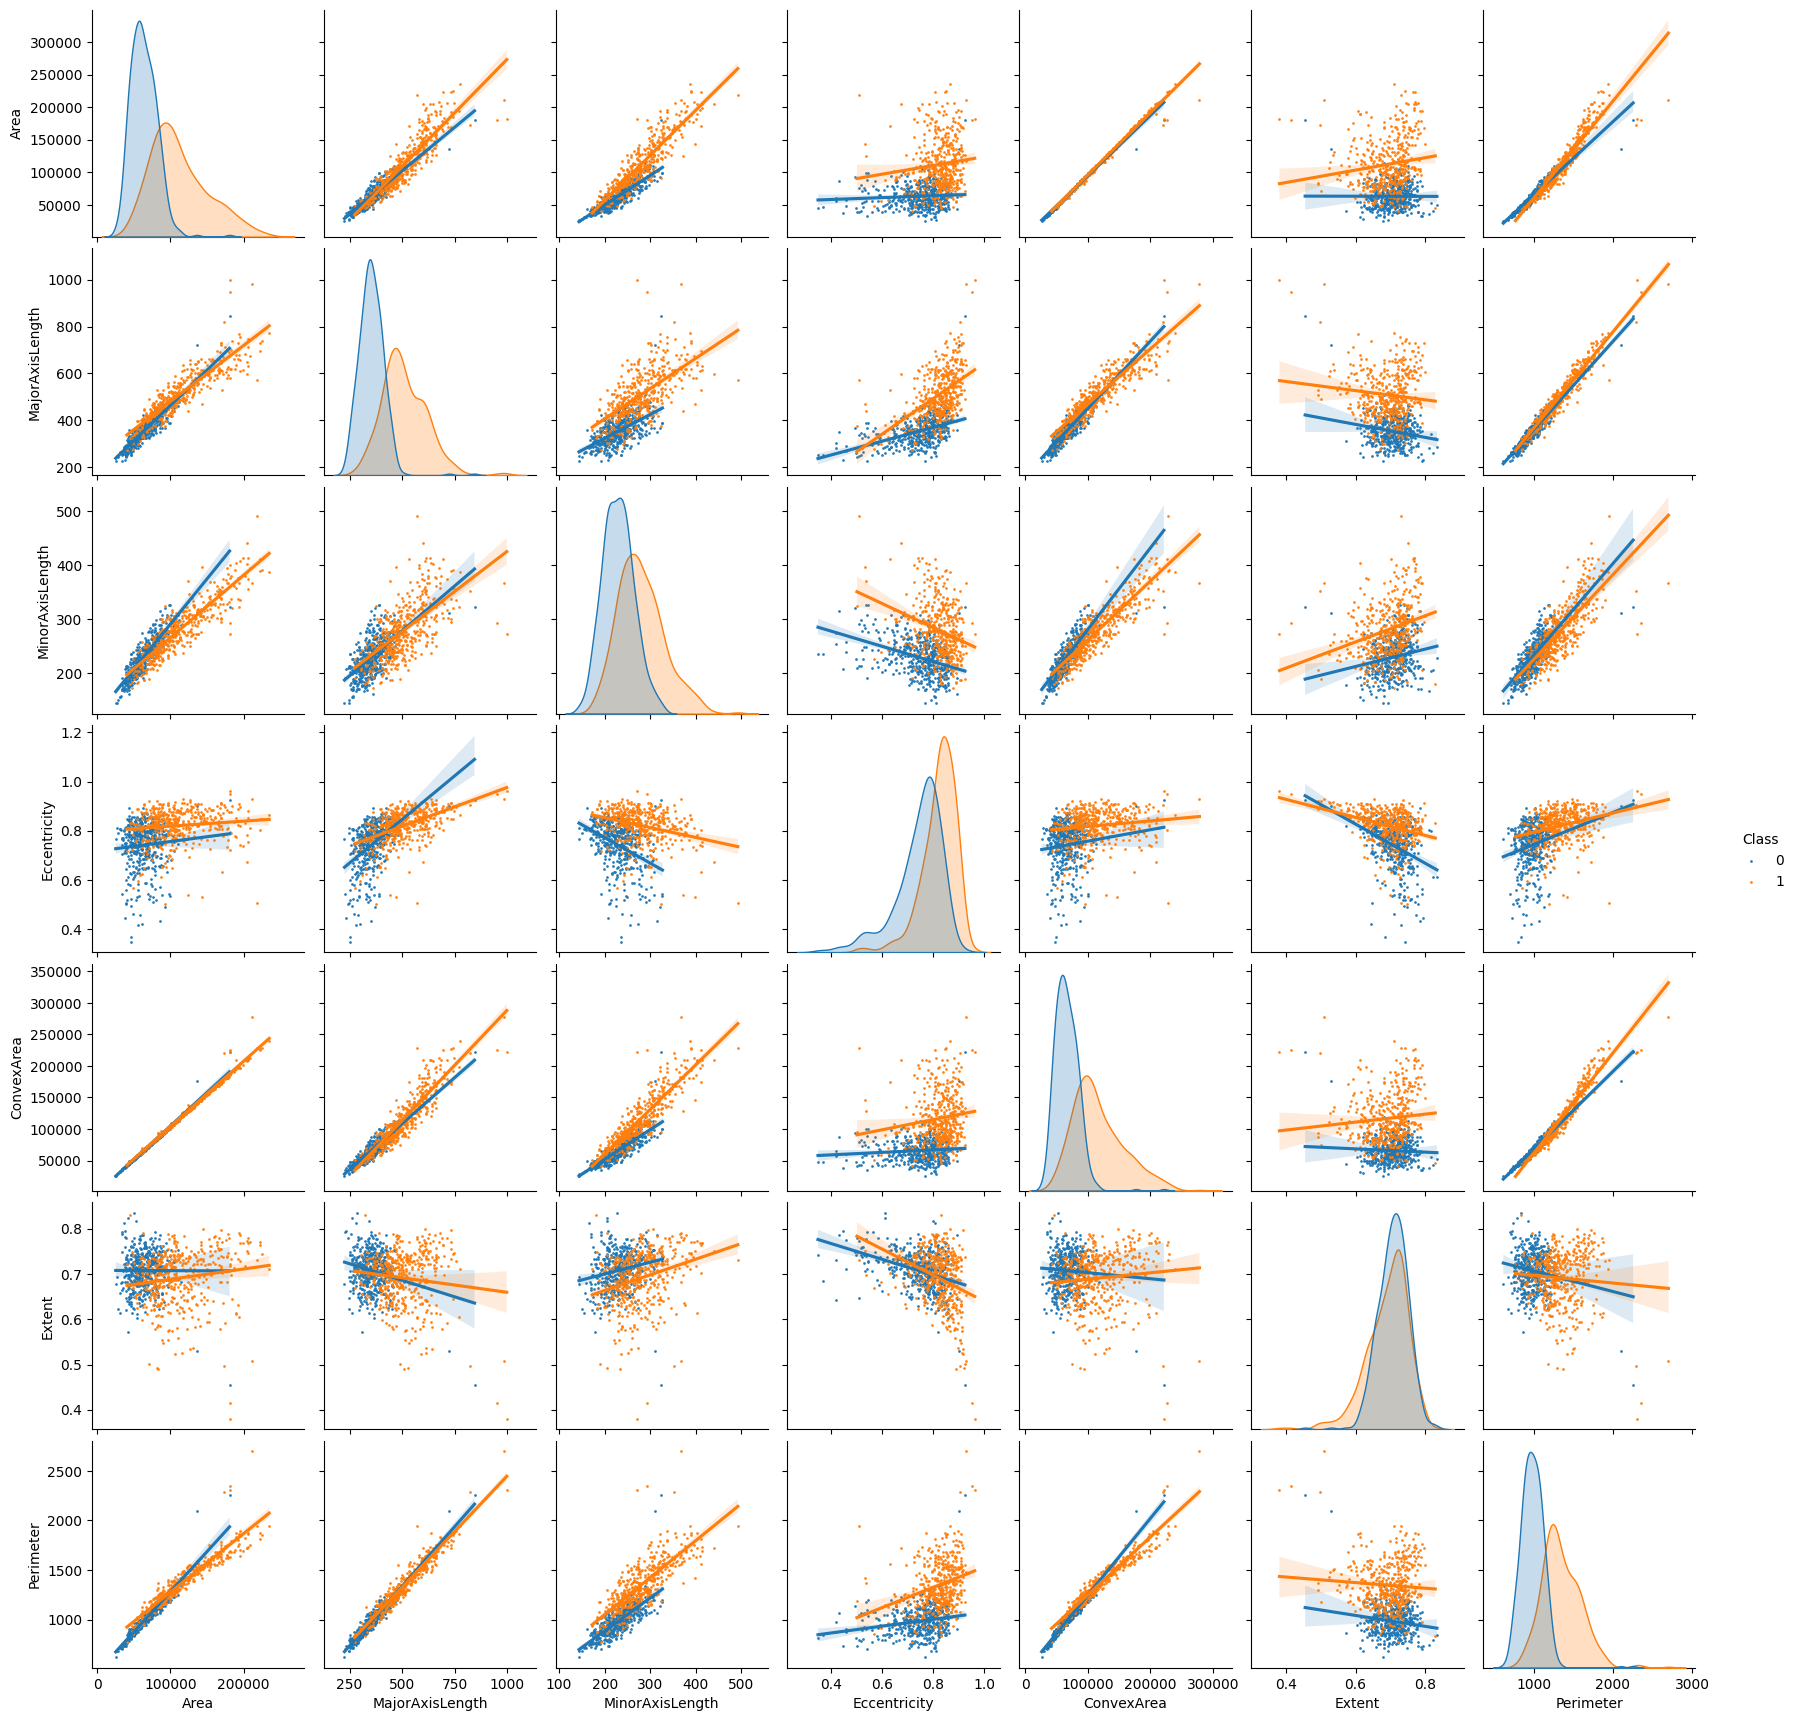

In [24]:
sns.pairplot(df, hue="Class", kind='reg', plot_kws={'scatter_kws':{'alpha':0.9, 's':1}})

## Train | Test Split and Scaling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
X = df.drop(columns=["Class"])
y = df["Class"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Scaling

In [31]:
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling and Performance

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

### With Default Parameters

In [34]:
log_model = LogisticRegression()

In [35]:
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0])

In [36]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[7.56122893e-01, 2.43877107e-01],
       [2.61795091e-01, 7.38204909e-01],
       [2.26244543e-03, 9.97737555e-01],
       [2.16597596e-01, 7.83402404e-01],
       [1.12689412e-01, 8.87310588e-01],
       [9.04391084e-01, 9.56089163e-02],
       [1.09120207e-01, 8.90879793e-01],
       [8.26101574e-01, 1.73898426e-01],
       [3.84534970e-01, 6.15465030e-01],
       [4.82207634e-01, 5.17792366e-01],
       [2.87290994e-02, 9.71270901e-01],
       [4.84506550e-01, 5.15493450e-01],
       [2.77065637e-01, 7.22934363e-01],
       [3.60414853e-01, 6.39585147e-01],
       [9.15518855e-01, 8.44811454e-02],
       [7.42907071e-01, 2.57092929e-01],
       [9.71652952e-01, 2.83470479e-02],
       [9.60712562e-01, 3.92874383e-02],
       [7.94889623e-01, 2.05110377e-01],
       [6.24550525e-01, 3.75449475e-01],
       [9.35589120e-01, 6.44108803e-02],
       [5.44575898e-02, 9.45542410e-01],
       [8.64789816e-04, 9.99135210e-01],
       [6.05817770e-07, 9.99999394e-01],
       [8.854441

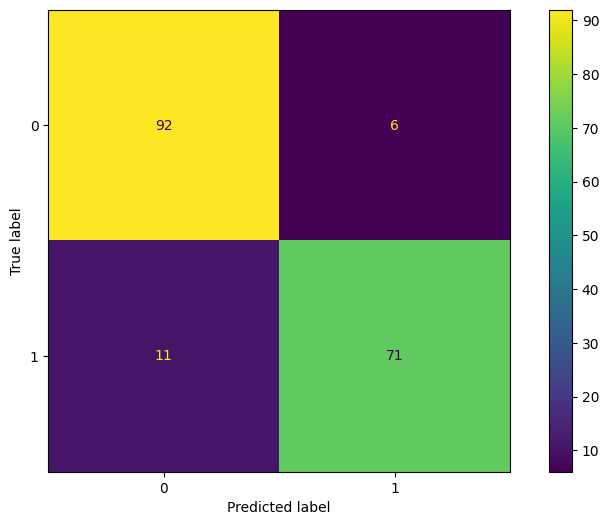

In [37]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

In [38]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [39]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[92  6]
 [11 71]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        98
           1       0.92      0.87      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180


Train_Set
[[309  43]
 [ 59 309]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       352
           1       0.88      0.84      0.86       368

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



### Cross Validate

In [40]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.858
test_precision_weighted   0.861
test_recall_weighted      0.858
test_f1_weighted          0.858
dtype: float64

In [41]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [42]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

In [43]:
model = LogisticRegression() # model sıfırlanır

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}, 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision_0  test_recall_0  test_f1_0
1      0.011       0.002             0.725          0.829      0.773
2      0.008       0.003             0.865          0.914      0.889
3      0.007       0.002             0.806          0.829      0.817
4      0.005       0.002             0.909          0.857      0.882
5      0.005       0.002             0.825          0.943      0.880
6      0.004       0.002             0.857          0.857      0.857
7      0.003       0.002             0.865          0.914      0.889
8      0.004       0.001             0.879          0.829      0.853
9      0.005       0.001             0.846          0.917      0.880
10     0.002       0.001             0.842          0.889      0.865

### GridSearchCV

In [44]:
log_model = LogisticRegression(solver='liblinear', penalty='l1')

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) ## Alpha nın tersi şeklinde çalışıyor

param_grid = {"penalty" : penalty,
             "C" : C}

In [47]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=10)

In [48]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [51]:
grid_model.best_params_

{'C': 0.42813323987193935, 'penalty': 'l2'}

In [52]:
grid_model.best_score_

0.861111111111111

In [53]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0])

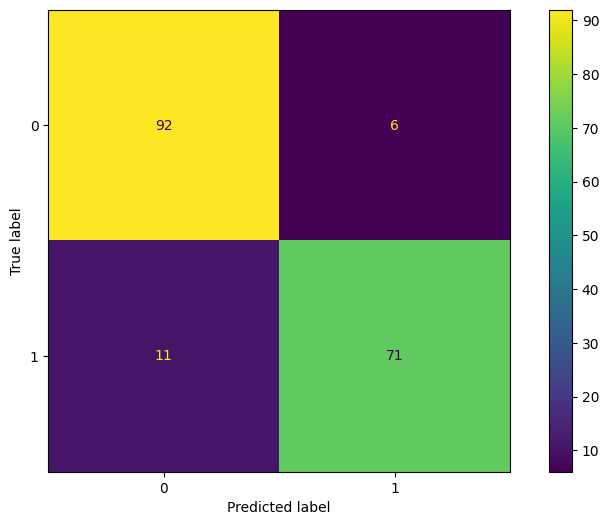

In [54]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)
plt.show()

In [55]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[92  6]
 [11 71]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        98
           1       0.92      0.87      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180


Train_Set
[[310  42]
 [ 59 309]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       352
           1       0.88      0.84      0.86       368

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [56]:
from sklearn.metrics import plot_roc_curve

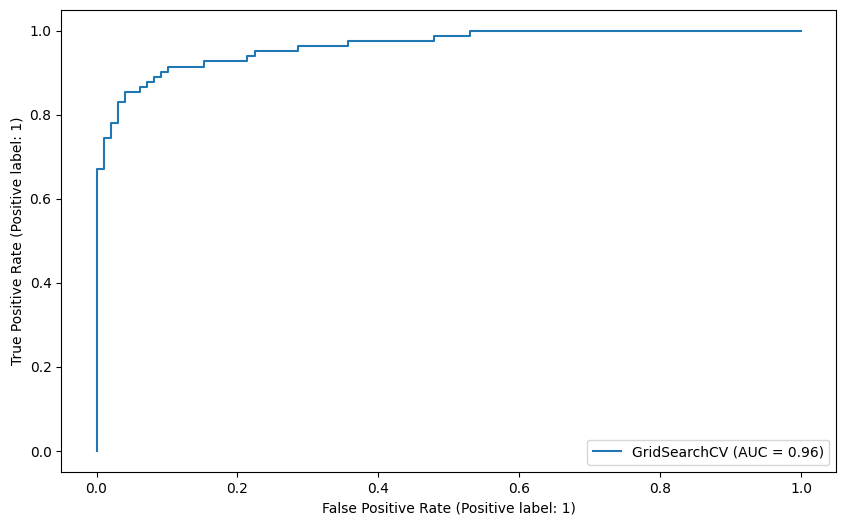

In [57]:
plot_roc_curve(grid_model, X_test_scaled, y_test);
plt.show()

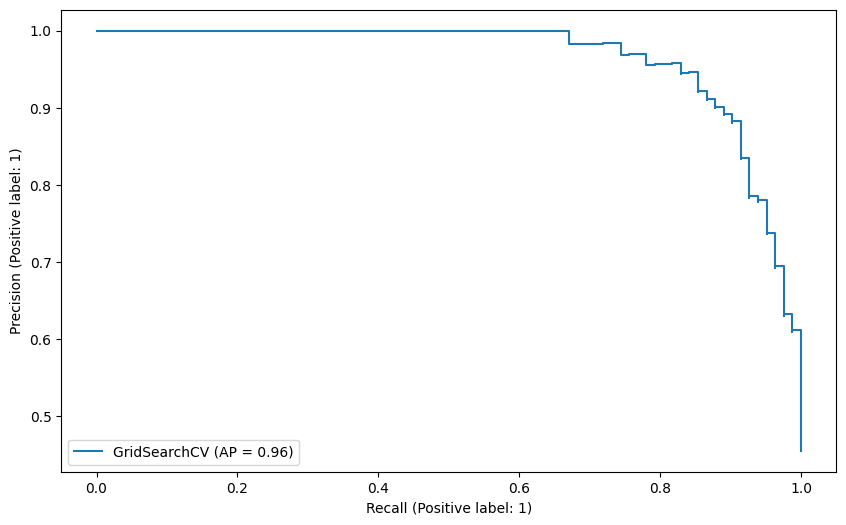

In [58]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(grid_model, X_test_scaled, y_test);
plt.show()

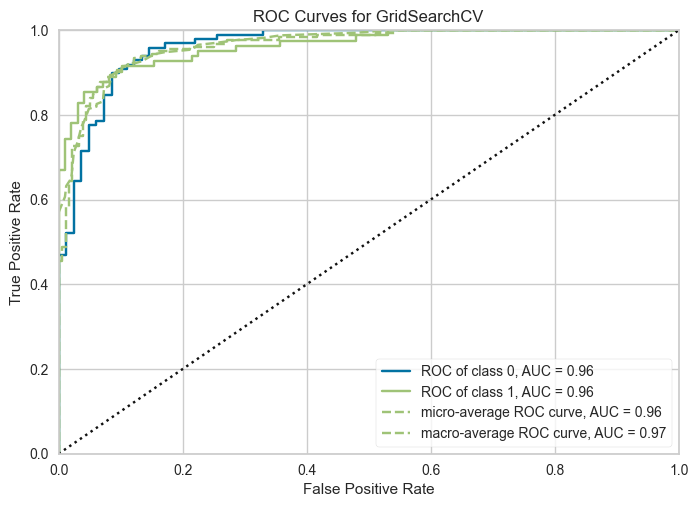

In [59]:
from yellowbrick.classifier import ROCAUC
model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show(); 

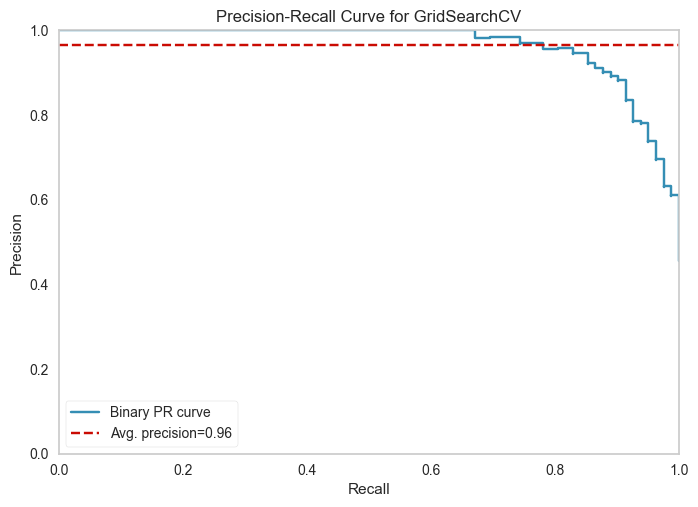

In [60]:
from yellowbrick.classifier import PrecisionRecallCurve

model = grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,#buraya bunu vermezsek binary gibi çalışır.
    cmap="Set1"
)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show();

In [61]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba[:,1])

0.9663466255570377

# Conclusion 

In [63]:
scaler = StandardScaler().fit(X)

In [64]:
import pickle
pickle.dump(scaler, open("scaler_raisin", 'wb'))

In [65]:
X_scaled_raisin = scaler.transform(X)

In [66]:
final_model = LogisticRegression().fit(X_scaled_raisin, y)

In [67]:
pickle.dump(final_model, open("final_model_raisin", 'wb'))

In [68]:
X.describe().T

count      mean       std       min       25%       50%  \
Area            900.000 87804.128 39002.111 25387.000 59348.000 78902.000   
MajorAxisLength 900.000   430.930   116.035   225.630   345.443   407.804   
MinorAxisLength 900.000   254.488    49.989   143.711   219.111   247.848   
Eccentricity    900.000     0.782     0.090     0.349     0.742     0.799   
ConvexArea      900.000 91186.090 40769.290 26139.000 61513.250 81651.000   
Extent          900.000     0.700     0.053     0.380     0.671     0.707   
Perimeter       900.000  1165.907   273.764   619.074   966.411  1119.509   

                       75%        max  
Area            105028.250 235047.000  
MajorAxisLength    494.187    997.292  
MinorAxisLength    279.889    492.275  
Eccentricity         0.843      0.962  
ConvexArea      108375.750 278217.000  
Extent               0.735      0.835  
Perimeter         1308.390   2697.753

In [69]:
my_dict = {"Area": [110804.128, 50804.128, 80804.128],
           "MajorAxisLength": [400.930, 200.930, 500.930],
           "MinorAxisLength": [200.488, 280.488, 225.488],
           "Eccentricity": [0.482, 0.682, 0.882],
           "ConvexArea": [80186.090, 100186.090, 12086.090],
           "Extent": [0.482, 0.682, 0.882], 
           "Perimeter": [1065.907, 1865.907, 2265.907], 
          }
sample = pd.DataFrame(my_dict)
sample

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 110804.128          400.930          200.488         0.482   80186.090   
1  50804.128          200.930          280.488         0.682  100186.090   
2  80804.128          500.930          225.488         0.882   12086.090   

   Extent  Perimeter  
0   0.482   1065.907  
1   0.682   1865.907  
2   0.882   2265.907

In [70]:
final_model.predict(sample)

array([1, 1, 1])

In [71]:
scaler_raisin = pickle.load(open("scaler_raisin", "rb"))

In [73]:
predictions = final_model.predict(sample_raisin_scaled) 
predictions
# final modele predict için scale edilen sample verilir

array([1, 1, 1])

In [74]:
predictions_proba = final_model.predict_proba(sample_raisin_scaled) 
# samplenin proba değerlerini alırız

predictions_proba

array([[3.98448024e-01, 6.01551976e-01],
       [1.19912489e-02, 9.88008751e-01],
       [7.12686494e-05, 9.99928731e-01]])

In [75]:
sample["pred"] = predictions
sample["pred_proba_keçimen"] = predictions_proba[:,0]
sample["pred_proba_besni"] = predictions_proba[:,1]

sample

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 110804.128          400.930          200.488         0.482   80186.090   
1  50804.128          200.930          280.488         0.682  100186.090   
2  80804.128          500.930          225.488         0.882   12086.090   

   Extent  Perimeter  pred  pred_proba_keçimen  pred_proba_besni  
0   0.482   1065.907     1               0.398             0.602  
1   0.682   1865.907     1               0.012             0.988  
2   0.882   2265.907     1               0.000             1.000